In [1494]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn import svm
import seaborn as sns
import scikitplot as skplt
import joblib

In [1495]:
df = pd.read_csv('data/The-Office-Lines-V3.csv', encoding='latin-1')

In [1496]:
df['line'] = df['line'].str.lower()

In [1497]:
speakers = []
for i in df.speaker.value_counts().head(22).index:
    speakers.append(i)

In [1498]:
speaker_extras = ["'", 'and', '&', '/', 'as', ',']

In [1499]:
df = df[df.speaker.str.match('|'.join(speakers))]
df.drop(df[df.speaker.str.contains('|'.join(speaker_extras))].index, inplace=True)

In [1500]:
df.speaker.unique()

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Phyllis', 'Stanley',
       'Oscar', 'Angela', 'Kevin', 'Ryan', 'Toby', 'Kelly', 'Meredith',
       'Darryl', 'Creed', 'Andy', 'Dwight ', 'Michael ', 'Dwight:',
       'Robert Dunder', 'DwightKSchrute', 'Holly', 'Jim ', 'Erin', 'Gabe',
       'Dwight: ', 'Michael: ', 'Jim: ', 'Meredith: ', 'Angela: ',
       'Creed: ', 'Phyllis: ', 'Oscar: ', 'Stanley: ', 'Darryl: ',
       'Andy: ', 'Pam: ', 'Erin: ', 'Kevin: ', 'Ryan: ', 'Kelly: ',
       'Dwight.', 'Pam ', 'Robert', 'Robert California', 'Nellie Bertram',
       'Nellie', 'Ryan Howard'], dtype=object)

In [1501]:
df['speaker'] = df.speaker.str.replace(': ','')
df['speaker'] = df.speaker.str.replace(':','')
df['speaker'] = df.speaker.str.replace('.','')
df['speaker'] = df.speaker.str.replace('Dwight ','Dwight')
df['speaker'] = df.speaker.str.replace('Michael ','Michael')
df['speaker'] = df.speaker.str.replace('DwightKSchrute','Dwight')
df['speaker'] = df.speaker.str.replace('Jim ','Jim')
df['speaker'] = df.speaker.str.replace('Pam ','Pam')
df['speaker'] = df.speaker.str.replace('Robert California','Robert')
df['speaker'] = df.speaker.str.replace('Nellie Bertram','Nellie')

In [1502]:
df.speaker.unique()

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Phyllis', 'Stanley',
       'Oscar', 'Angela', 'Kevin', 'Ryan', 'Toby', 'Kelly', 'Meredith',
       'Darryl', 'Creed', 'Andy', 'Robert Dunder', 'Holly', 'Erin',
       'Gabe', 'Robert', 'Nellie', 'Ryan Howard'], dtype=object)

In [1503]:
df.drop(df[df.speaker=='Ryan Howard'].index, inplace=True)
df.drop(df[df.speaker=='Robert Dunder'].index, inplace=True)

In [1504]:
df

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,all right jim. your quarterlies look very good...
1,1,1,Pilot,1,Jim,"oh, i told you. i couldn't close it. so..."
2,1,1,Pilot,1,Michael,so you've come to the master for guidance? is ...
3,1,1,Pilot,1,Jim,"actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"all right. well, let me show you how it's done."
...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,it all seems so very arbitrary. i applied for ...
54622,9,24,Finale,8154,Meredith,i just feel lucky that i got a chance to share...
54623,9,24,Finale,8155,Phyllis,i'm happy that this was all filmed so i can re...
54624,9,24,Finale,8156,Jim,i sold paper at this company for 12 years. my ...


In [1505]:
X = df.line
y = df.speaker

In [1506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1507]:
count_vect = CountVectorizer(stop_words='english', )
X_train_counts = count_vect.fit_transform(X_train)

In [1508]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [1509]:
print(X_train_counts.shape)
print(X_train_tfidf.shape)

(38272, 16142)
(38272, 16142)


In [1510]:
cnb = ComplementNB().fit(X_train_tfidf, y_train)

In [1511]:
cnb.n_features_in_

16142

In [1512]:
# cnb_pipeline = Pipeline([
#     ('vect', CountVectorizer(stop_words='english')),
#     ('tfidf', TfidfTransformer()),
#     ('cnb', ComplementNB()),
#     ])

In [1513]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [1514]:
print(X_test_counts.shape)
print(X_test_tfidf.shape)

(9568, 16142)
(9568, 16142)


In [1515]:
pred = cnb.predict(X_test_tfidf)

In [1516]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [1517]:
np.mean(pred == y_test)

0.23400919732441472

In [1518]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

        Andy       0.15      0.22      0.17       750
      Angela       0.18      0.10      0.13       329
       Creed       0.07      0.03      0.04        77
      Darryl       0.27      0.16      0.20       230
      Dwight       0.31      0.25      0.28      1372
        Erin       0.12      0.08      0.10       257
        Gabe       0.06      0.04      0.05        75
       Holly       0.11      0.05      0.07       114
         Jan       0.10      0.05      0.06       169
         Jim       0.21      0.29      0.24      1187
       Kelly       0.15      0.08      0.10       176
       Kevin       0.12      0.07      0.09       296
    Meredith       0.09      0.06      0.07       100
     Michael       0.32      0.43      0.37      2193
      Nellie       0.08      0.03      0.05       123
       Oscar       0.12      0.05      0.07       296
         Pam       0.19      0.21      0.20      1019
     Phyllis       0.12    

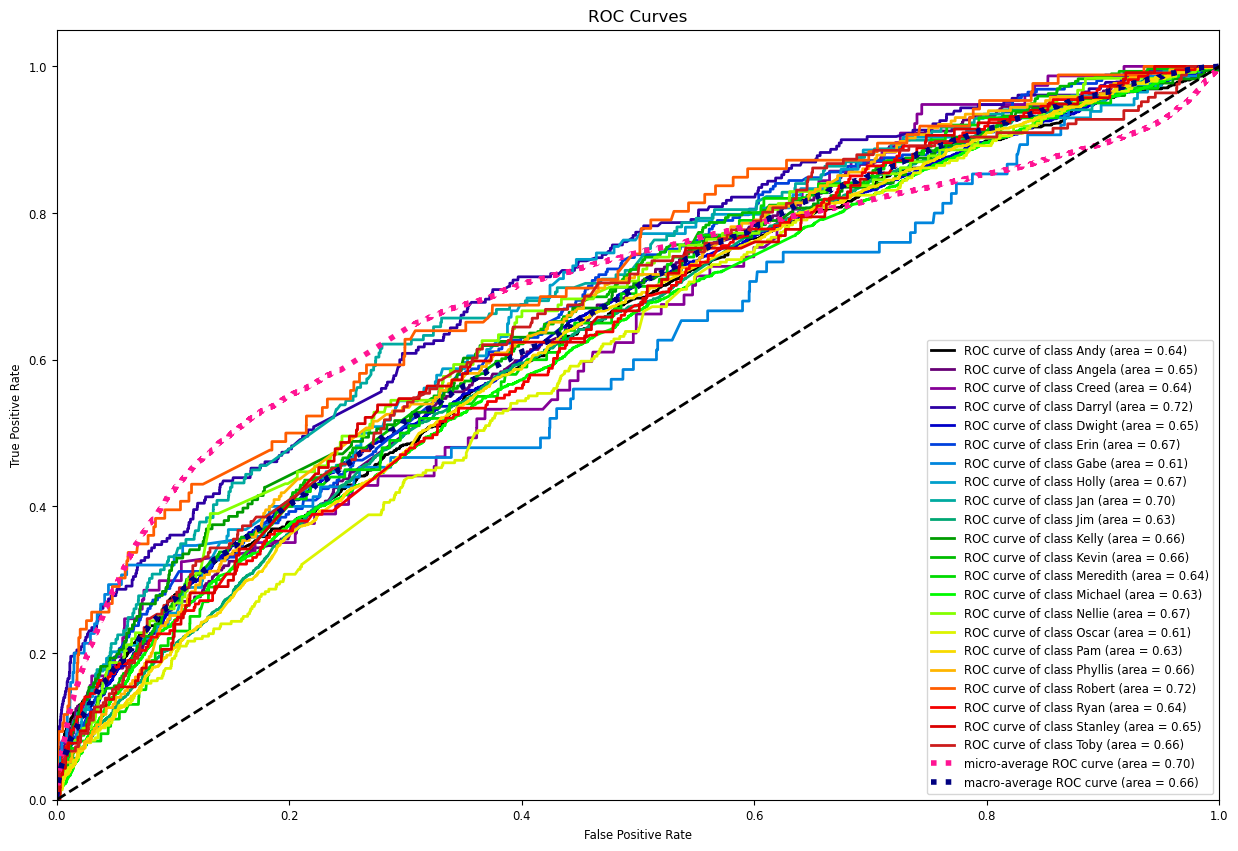

In [1519]:
y_true = y_test
y_probas = cnb.predict_proba(X_test_tfidf)
skplt.metrics.plot_roc(y_true, y_probas, text_fontsize='small', figsize=(15, 10))
plt.show()

In [1520]:
# mnb = MultinomialNB().fit(X_train_tfidf, y_train)

In [1521]:
# pred = mnb.predict(X_test_tfidf)

In [1522]:
# print(metrics.classification_report(y_test, pred))

In [1523]:
# result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [1524]:
# result.Predicted.value_counts()

In [1525]:
# docs_new = ["that's what she said"]
# X_new_counts = count_vect.transform(docs_new)
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [1526]:
# print(X_new_tfidf.shape)
# X_new_counts.shape

In [1527]:
# cnb.predict(X_new_tfidf)

In [1564]:
# feature_words = count_vect.get_feature_names()
# n = 7 #number of top words associated with the category that we wish to see

# for cat in range(len(speakers)):
#     print(f"\nTarget: {cat}, name: {y[cat]}")
#     log_prob = clf.feature_log_prob_[cat]
#     i_topn = np.argsort(log_prob)[::-1][:n]
#     features_topn = [feature_words[i] for i in i_topn]
#     print(f"Top {n} tokens: ", features_topn)

# Top 3

In [1529]:
speakers = []
for i in df.speaker.value_counts().head(3).index:
    speakers.append(i)

In [1530]:
df = df[df.speaker.str.match('|'.join(speakers))]

In [1531]:
df.speaker.value_counts()

Michael    10850
Dwight      6793
Jim         6257
Name: speaker, dtype: int64

In [1532]:
X = df.line
y = df.speaker

In [1533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [1548]:
count_vect = CountVectorizer(stop_words='english', decode_error='replace')
X_train_counts = count_vect.fit_transform(X_train)

In [1535]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [1559]:
cnb = ComplementNB().fit(X_train_tfidf, y_train)

In [1560]:
X_test_tfidf.shape

(4780, 11759)

In [1561]:
cnb.n_features_in_

11759

In [1562]:
# joblib.dump(cnb, './models/cnb.pkl')
# joblib.dump(count_vect.vocabulary_, './models/countVec.pkl')
# joblib.dump(tfidf_transformer, './models/tfidf.pkl')

['./models/cnb.pkl']

In [1539]:
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [1540]:
X_train_tfidf.shape

(19120, 11759)

In [1541]:
cnb.n_features_in_

11759

In [1542]:
pred = cnb.predict(X_test_tfidf)

In [1543]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [1544]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

      Dwight       0.45      0.41      0.43      1359
         Jim       0.41      0.36      0.38      1251
     Michael       0.55      0.63      0.59      2170

    accuracy                           0.49      4780
   macro avg       0.47      0.46      0.47      4780
weighted avg       0.49      0.49      0.49      4780



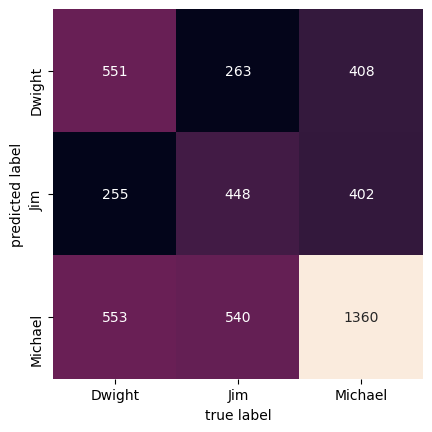

In [1545]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Dwight', 'Jim', 'Michael'], yticklabels=['Dwight', 'Jim', 'Michael'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [1546]:
result.Predicted.value_counts()

Michael    2453
Dwight     1222
Jim        1105
Name: Predicted, dtype: int64

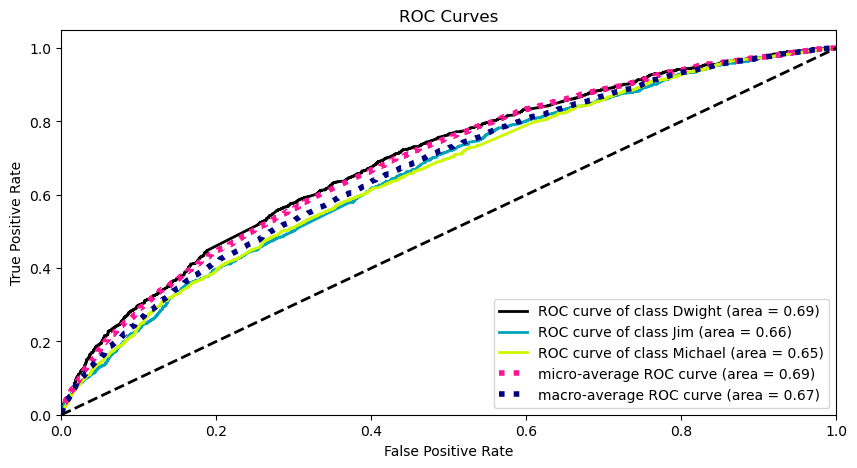

In [1547]:
y_true = y_test
y_probas = cnb.predict_proba(X_test_tfidf)
skplt.metrics.plot_roc(y_true, y_probas, figsize=(10, 5))
plt.show()

In [1212]:
# mnb = MultinomialNB().fit(X_train_tfidf, y_train)

In [1213]:
# pred = mnb.predict(X_test_tfidf)

In [1214]:
# print(metrics.classification_report(y_test, pred))

In [1215]:
# result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [1216]:
# result.Predicted.value_counts()

In [1217]:
# mat = confusion_matrix(y_test, pred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

In [1218]:
# y_true = y_test
# y_probas = mnb.predict_proba(X_test_tfidf)
# skplt.metrics.plot_roc(y_true, y_probas, figsize=(10, 5))
# plt.show()

In [1219]:
# svc = svm.SVC(decision_function_shape='ovo')
# svc.fit(X_train_tfidf, y_train)

In [1220]:
# pred = svc.predict(X_test_tfidf)

In [1221]:
# print(metrics.classification_report(y_test, pred))

In [1222]:
# mat = confusion_matrix(y_test, pred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=['Dwight', 'Jim', 'Michael'], yticklabels=['Dwight', 'Jim', 'Michael'])

# plt.xlabel('true label')
# plt.ylabel('predicted label');

In [1223]:
# result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [1155]:
from sklearn.neural_network import MLPClassifier

In [1264]:
# mlp = MLPClassifier(verbose=True, max_iter=1000).fit(X_train_tfidf, y_train)

Iteration 1, loss = 1.05440418
Iteration 2, loss = 0.94770857
Iteration 3, loss = 0.82718122
Iteration 4, loss = 0.73816186
Iteration 5, loss = 0.67708544
Iteration 6, loss = 0.63501656
Iteration 7, loss = 0.60319840
Iteration 8, loss = 0.57963924
Iteration 9, loss = 0.56105379
Iteration 10, loss = 0.54461539
Iteration 11, loss = 0.53147885
Iteration 12, loss = 0.52051821
Iteration 13, loss = 0.51063147
Iteration 14, loss = 0.50060154
Iteration 15, loss = 0.49207967
Iteration 16, loss = 0.48443515
Iteration 17, loss = 0.47705976
Iteration 18, loss = 0.47018962
Iteration 19, loss = 0.46355099
Iteration 20, loss = 0.45672103
Iteration 21, loss = 0.45186029
Iteration 22, loss = 0.44543477
Iteration 23, loss = 0.43940705
Iteration 24, loss = 0.43438616
Iteration 25, loss = 0.42919875
Iteration 26, loss = 0.42389573
Iteration 27, loss = 0.41918367
Iteration 28, loss = 0.41497962
Iteration 29, loss = 0.40996265
Iteration 30, loss = 0.40586510
Iteration 31, loss = 0.40232019
Iteration 32, los

Iteration 253, loss = 0.26427845
Iteration 254, loss = 0.26453733
Iteration 255, loss = 0.26330645
Iteration 256, loss = 0.26517909
Iteration 257, loss = 0.26412266
Iteration 258, loss = 0.26410164
Iteration 259, loss = 0.26403211
Iteration 260, loss = 0.26435350
Iteration 261, loss = 0.26372872
Iteration 262, loss = 0.26398091
Iteration 263, loss = 0.26381531
Iteration 264, loss = 0.26353241
Iteration 265, loss = 0.26365071
Iteration 266, loss = 0.26372192
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [1265]:
print(X_test_tfidf.shape)
print(X_train_tfidf.shape)

(4780, 11732)
(19120, 11732)


In [1268]:
pred = mlp.predict(X_test_tfidf)

In [1269]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

      Dwight       0.47      0.33      0.39      1359
         Jim       0.38      0.33      0.36      1251
     Michael       0.52      0.66      0.58      2170

    accuracy                           0.48      4780
   macro avg       0.46      0.44      0.44      4780
weighted avg       0.47      0.48      0.47      4780



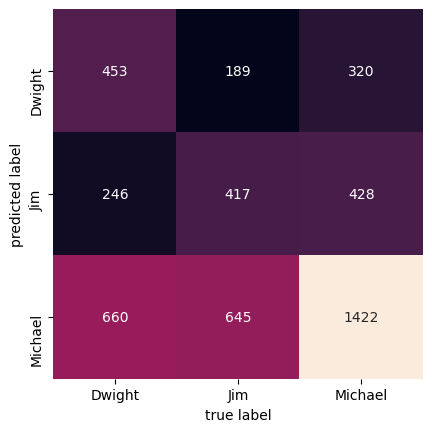

In [1270]:
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Dwight', 'Jim', 'Michael'], yticklabels=['Dwight', 'Jim', 'Michael'])
plt.xlabel('true label')
plt.ylabel('predicted label');

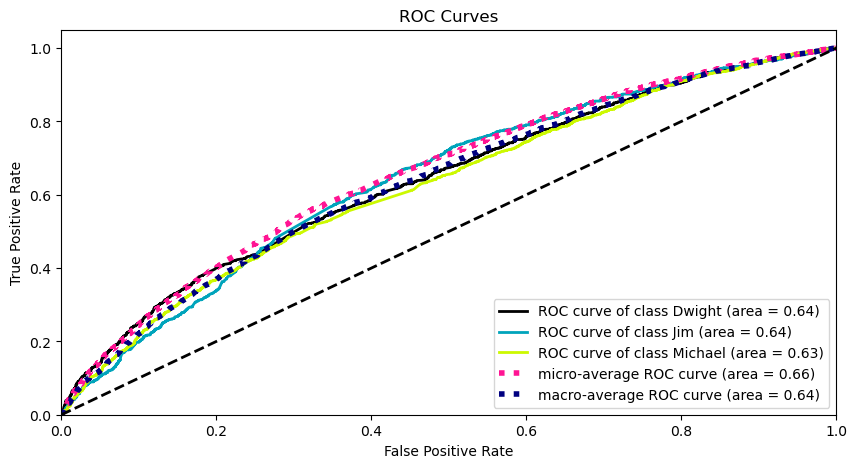

In [1271]:
y_true = y_test
y_probas = mlp.predict_proba(X_test_tfidf)
skplt.metrics.plot_roc(y_true, y_probas, figsize=(10, 5))
plt.show()